RL Bandits (notes)
===============

# Description
Each bandit generates random number from a normal distribution n~N(0+m, 1) where is unknown to the AI. The objective of the agent is to learn to chose the best bandit to play and maximize running mean of outcomes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from eps_greedy import Bandit
from optimistic_initial_vals import run_experiment as run_experiment_oiv
from ucb1 import run_experiment as run_experiment_ucb

# Methods

## Epsilon Greedy with decaying epsilon
We can assume the more we play the more we know about the environment therefor there is no need to experiment a lot.

In [2]:
def run_experiment_decaying_epsilon(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)

    for i in range(N):
        # eps greedy
        p = np.random.random()
        if p < 1.0/(i+1):
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
    
        data[i] = x
    cumul_mean = np.cumsum(data)/ (np.arange(N) + 1)

    # plots
    plt.plot(cumul_mean)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.title(f"Cumulative mean for experiment w/ decaying eps")
    plt.xlabel("N")
    plt.ylabel("Cumul mean")
    plt.show()

    return cumul_mean

## Optimistic Initial Values
Assume bandits means to be higher than they are (can be) so while learning our calculated mean for the agent only decreases.

In [3]:
# def run_experiment_oiv(m1, m2, m3, N, upper_lim = 10):
#     bandits = [Bandit(m1, upper_lim), Bandit(m2, upper_lim), Bandit(m3, upper_lim)]

#     data = np.empty(N)

#     for i in range(N):
#         # optimisitc init; no eps greedy
#         j = np.argmax([b.mean for b in bandits])

#         x = bandits[j].pull()
#         bandits[j].update(x)

#         data[i] = x
#     cumul_mean = np.cumsum(data) / (np.arange(N) + 1)

#     # plots
#     plt.plot(cumul_mean)
#     plt.plot(np.ones(N)*m1)
#     plt.plot(np.ones(N)*m2)
#     plt.plot(np.ones(N)*m3)
#     plt.xscale('log')
#     plt.title(f"Cumulative mean for OIV experiment")
#     plt.xlabel("N")
#     plt.ylabel("Cumul mean")
#     plt.show()

#     for b in bandits:
#         print(f"(OIV) Calculated mean for the bandit with m = {b.m} : {b.mean}")
    
#     return cumul_mean

## UCB1

In [4]:
# def run_experiment_ucb(m1, m2, m3, N):
#     bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

#     data = np.empty(N)

#     for i in range(N):
#         # UCB1; no eps greedy
#         j = np.argmax([ucb(b.mean, i+1, b.N) for b in bandits])

#         x = bandits[j].pull()
#         bandits[j].update(x)

#         data[i] = x
#     cumul_mean = np.cumsum(data) / (np.arange(N) + 1)

#     # plots
#     plt.plot(cumul_mean)
#     plt.plot(np.ones(N)*m1)
#     plt.plot(np.ones(N)*m2)
#     plt.plot(np.ones(N)*m3)
#     plt.xscale('log')
#     plt.title(f"Cumulative mean for UCB1 experiment")
#     plt.xlabel("N")
#     plt.ylabel("Cumul mean")
#     plt.show()

#     for b in bandits:
#         print(f"(UCB1) Calculated mean for the bandit with m = {b.m} : {b.mean}")
    
#     return cumul_mean

## Bayesian (Thompson) Sampling
Uses Central Limit Theorem for random events. If we have enough samples drawn from any distribution, their distribution will be Normal with mean equal to the mean of base distribution.  
Requires special bandit with a `sample()` function. 

In [5]:
class BayesianBandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.predicted_mean = 0
        self.lambda_ = 1
        self.sum_x = 0
        self.tau = 1
        
    def pull(self):
        """
        Give random outcome for the distr
        """
        return np.random.randn() + self.true_mean

    def sample(self):
        return np.random.randn()/np.sqrt(self.lambda_) + self.predicted_mean

    def update(self, x):
        self.lambda_ += self.tau
        self.sum_x += x
        self.predicted_mean = self.tau*self.sum_x/self.lambda_

In [6]:
def run_experiment_bayes(m1, m2, m3, N):
    bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]

    data = np.empty(N)

    for i in range(N):
        # Thompson sampling
        j = np.argmax([b.sample() for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        data[i] = x
    cumul_mean = np.cumsum(data) / (np.arange(N) + 1)

    # plots
    plt.plot(cumul_mean)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.title(f"Cumulative mean for Bayesian Sampling experiment")
    plt.xlabel("N")
    plt.ylabel("Cumul mean")
    plt.show()

    for b in bandits:
        print(f"Calculated mean for the bayes bandit with m = {b.true_mean} : {b.predicted_mean}")
    
    return cumul_mean

# Comparison
Bandits have means 1, 2, and 3. All agents learn that it is the best to play Bandit 3 only. Although the graphs look different they all approach the same final value of 3.

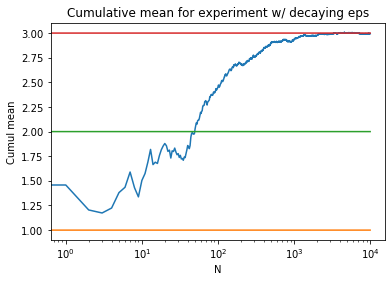

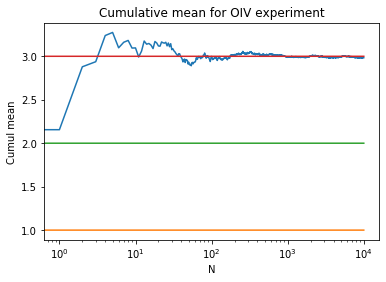

(OIV) Calculated mean for the bandit with m = 1.0 : 1.8848018796645647
(OIV) Calculated mean for the bandit with m = 2.0 : 2.426105110756223
(OIV) Calculated mean for the bandit with m = 3.0 : 2.983755006599503


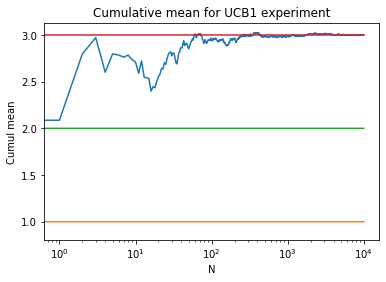

(UCB1) Calculated mean for the bandit with m = 1.0 : 0.8733630348761139
(UCB1) Calculated mean for the bandit with m = 2.0 : 2.084835321900514
(UCB1) Calculated mean for the bandit with m = 3.0 : 3.000065504061439


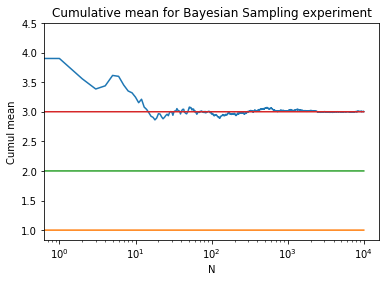

Calculated mean for the bayes bandit with m = 1.0 : 0.9146284077637277
Calculated mean for the bayes bandit with m = 2.0 : 1.4566635902548797
Calculated mean for the bayes bandit with m = 3.0 : 3.0033783573203596


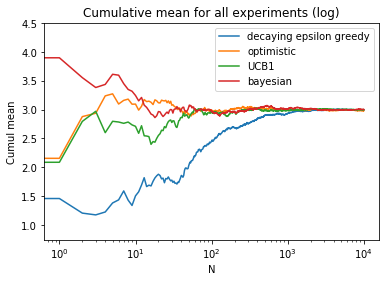

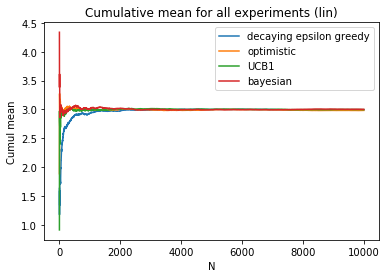

In [7]:
if __name__ == "__main__":
    m1, m2, m3 = 1.0, 2.0, 3.0
    N = 10000
    eps = run_experiment_decaying_epsilon(m1,m2,m3,N)
    oiv = run_experiment_oiv(m1,m2,m3,N)
    ucb = run_experiment_ucb(m1,m2,m3,N)
    bayes = run_experiment_bayes(m1,m2,m3,N)
    
    # plot
    plt.plot(eps, label = "decaying epsilon greedy")
    plt.plot(oiv, label = "optimistic")
    plt.plot(ucb, label = "UCB1")
    plt.plot(bayes, label = "bayesian")
    plt.legend()
    plt.xscale('log')
    plt.title("Cumulative mean for all experiments (log)")
    plt.xlabel("N")
    plt.ylabel("Cumul mean")
    plt.show()


    # plot
    plt.plot(eps, label = "decaying epsilon greedy")
    plt.plot(oiv, label = "optimistic")
    plt.plot(ucb, label = "UCB1")
    plt.plot(bayes, label = "bayesian")
    plt.legend()
    plt.xscale('linear')
    plt.title("Cumulative mean for all experiments (lin)")
    plt.xlabel("N")
    plt.ylabel("Cumul mean")
    plt.show()